I am used to opencv 3, so I usually use it. If you prefer 4, please go right ahead and use it

In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 57 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


##Get data

Get data to calculate the homography between consecutive images. Note all my data are stored in my drive.

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Just change the name of the searched file.

listed = drive.ListFile({'q': "title contains 'flow_files_anon002.zip'"}).GetList()
for flow_file in listed:
  print('title {}, id {}'.format(flow_file['title'], flow_file['id']))

listed = drive.ListFile({'q': "title contains 'flow_files_raft_anon002.rar'"}).GetList()
for flow_file_raft in listed:
  print('title {}, id {}'.format(flow_file_raft['title'], flow_file_raft['id']))

listed = drive.ListFile({'q': "title contains 'masks.zip'"}).GetList()
for mask_file in listed:
  print('title {}, id {}'.format(mask_file['title'], mask_file['id']))

listed = drive.ListFile({'q': "title contains 'anon002.zip'"}).GetList()
for video_file in listed:
  print('title {}, id {}'.format(video_file['title'], video_file['id']))

listed = drive.ListFile({'q': "title contains 'scripts.zip'"}).GetList()
for scripts_file in listed:
  print('title {}, id {}'.format(scripts_file['title'], scripts_file['id']))

listed = drive.ListFile({'q': "title contains 'anon002_miccai.zip'"}).GetList()
for H_file in listed:
  print('title {}, id {}'.format(H_file['title'], H_file['id']))

title flow_files_anon002.zip, id 1Xtf3a2LfouLcPwyKMsJQRnYvCNZiJUa7
title flow_files_raft_anon002.rar, id 1Rx1-GzN5xcG87I4arU3YjwjXUfBwqMRg
title masks.zip, id 1lBgLfSBD_8d0PxBSEI9uP7W3o-8bnZzW
title anon002.zip, id 1gc1LHkTElF1BNB5OfRjOczuvJHEAqWG8
title scripts.zip, id 1OIq_gEix1MsdlMD7_t7-9-dzg_5qgKNC
title anon002_miccai.zip, id 1rGeK9NJYWrEKc8Fch54fXjJcIrQ04i3F


In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = flow_file['id']

fname = os.path.join('/content', 'flow_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)



file_id = flow_file_raft['id']

fname = os.path.join('/content', 'flow_files_raft.rar')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = video_file['id']

fname = os.path.join('/content', 'video.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = scripts_file['id']

fname = os.path.join('/content', 'scripts.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

file_id = H_file['id']

fname = os.path.join('/content', 'H_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

file_id = mask_file['id']

fname = os.path.join('/content', 'masks.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

downloading to /content/flow_files.zip
downloading to /content/flow_files_raft.rar
downloading to /content/video.zip
downloading to /content/scripts.zip
downloading to /content/H_files.zip
downloading to /content/masks.zip


In [4]:
!unzip flow_files.zip
!unrar x flow_files_raft.rar
!unzip video.zip
!unzip scripts.zip
!unzip H_files.zip
!unzip masks.zip

Archive:  flow_files.zip
   creating: flow_files_anon002/
  inflating: flow_files_anon002/000000.flo  
  inflating: flow_files_anon002/000001.flo  
  inflating: flow_files_anon002/000002.flo  
  inflating: flow_files_anon002/000003.flo  
  inflating: flow_files_anon002/000004.flo  
  inflating: flow_files_anon002/000005.flo  
  inflating: flow_files_anon002/000006.flo  
  inflating: flow_files_anon002/000007.flo  
  inflating: flow_files_anon002/000008.flo  
  inflating: flow_files_anon002/000009.flo  
  inflating: flow_files_anon002/000010.flo  
  inflating: flow_files_anon002/000011.flo  
  inflating: flow_files_anon002/000012.flo  
  inflating: flow_files_anon002/000013.flo  
  inflating: flow_files_anon002/000014.flo  
  inflating: flow_files_anon002/000015.flo  
  inflating: flow_files_anon002/000016.flo  
  inflating: flow_files_anon002/000017.flo  
  inflating: flow_files_anon002/000018.flo  
  inflating: flow_files_anon002/000019.flo  
  inflating: flow_files_anon002/000020.flo

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)
import sys
from PIL import Image
from pathlib import Path
from skimage.metrics import structural_similarity as ssim
from os import listdir

In [6]:
import scripts.flow_file_processing as fp
import scripts.registration_processing as rp
import scripts.visualize as vis
import scripts.transformation_processing as tp
import scripts.ssim_processing as sp
import scripts.utility_processing as up
import scripts.config_project as config_project

In [7]:
%load_ext autoreload
%autoreload 2

Global Variables

In [8]:
seq_name = "anon002"
imgDirPath = '/content/' + seq_name
flowFileDirPath = '/content/flow_files_' + seq_name
raftFlowFileDirPath = "/content/flow_files_raft_" + seq_name
boxPlotName = 'boxplot_' + seq_name + '_extra_affine.png'
squareLength = 256
is_exact = False

padding_size = padding = 0
threshold = 7
showImages = False
transformation = "Affine"

window_size = 1
frame_distance = 5

if is_exact:
  seq_config = config_project.seq_exact
else:
  seq_config = config_project.seq_extra

seq_length = seq_config[seq_name]["file_length"] 
boxPlotTitle = seq_name + ' ' + '(' + str(seq_length) + ' frames)' 

Use resized for my work and optical flow, use nonresized for theirs

In [9]:
imgPaths =  [ imgDirPath + '/' + f  for f  in sorted(listdir(imgDirPath))]
flowPaths =  [ flowFileDirPath + '/' + f  for f  in sorted(listdir(flowFileDirPath))]
mask_path = '/content/masks/' + seq_name +  '_mask.png'

In [10]:
!mkdir resized_image

note that reszied images are actually cropped images

In [11]:
resizedImgDir = "/content/resized_image" 

In [12]:
IMG_SHAPE_STANDARD = (448,448);

In [13]:
def resize_all_images(path, resizedImgDir):
  dirs = os.listdir(path)
  for item in dirs:
      if item.lower().endswith(('.png', '.jpg', '.jpeg')):
        im = Image.open(os.path.join(path,item))
        # f, e = os.path.splitext(path+item)
        imResize = im.resize(IMG_SHAPE_STANDARD, Image.ANTIALIAS)
        imResize.save(os.path.join(resizedImgDir,item), 'PNG')

resize_all_images(imgDirPath, resizedImgDir)

In [14]:
resizedImgPaths =  [ resizedImgDir + '/' + f  for f  in sorted(listdir(resizedImgDir))]

In [15]:
resizedImgPaths[0]

'/content/resized_image/anon002_01631.png'

In [16]:
# imgPaths = config_project.get_img_paths(resizedImgPaths, seq_name, is_exact)
resizedImgPaths = config_project.get_img_paths(resizedImgPaths, seq_name, is_exact)
flowPaths = config_project.get_img_paths(flowPaths, seq_name, is_exact)

In [17]:
resizedImgPaths[0]

'/content/resized_image/anon002_01751.png'

In [18]:
flowPaths[0]

'/content/flow_files_anon002/000120.flo'

In [19]:
len(flowPaths)

300

In [20]:
v_crop_top = seq_config[seq_name]["v_crop_top"]
v_crop_bottom = seq_config[seq_name]["v_crop_bottom"]

mask_im = fp.get_mask_im(resizedImgPaths, mask_path, v_crop_top, v_crop_bottom)

In [21]:
len(resizedImgPaths)

300

# Using my method

In [22]:
if transformation == "Homography":
  H_array = np.zeros((len(imgPaths)-1, 3,3 ))
elif transformation == "Affine":    
  H_array = np.zeros((len(imgPaths)-1, 2,3 ))
  
showImages = False

In [23]:
for i in range(len(resizedImgPaths) - 1): #
  print(i)
  destImgPath = resizedImgPaths[i] #the previous image
  srcImgPath =  resizedImgPaths[i + 1];
  flowPath = flowPaths[i]

  srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
  flow = fp.inputAndFormatFlowfile(flowPath)
  I, J = fp.getCameraPixels(destImg, mask_im)
  ptsA, ptsB = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J)
  H, status = fp.findTransformation(ptsA, ptsB,transformation, threshold)
  
  H_array[i] = H

0
tag 202021.25 width 448 height 448
(448, 448, 2)
1
tag 202021.25 width 448 height 448
(448, 448, 2)
2
tag 202021.25 width 448 height 448
(448, 448, 2)
3
tag 202021.25 width 448 height 448
(448, 448, 2)
4
tag 202021.25 width 448 height 448
(448, 448, 2)
5
tag 202021.25 width 448 height 448
(448, 448, 2)
6
tag 202021.25 width 448 height 448
(448, 448, 2)
7
tag 202021.25 width 448 height 448
(448, 448, 2)
8
tag 202021.25 width 448 height 448
(448, 448, 2)
9
tag 202021.25 width 448 height 448
(448, 448, 2)
10
tag 202021.25 width 448 height 448
(448, 448, 2)
11
tag 202021.25 width 448 height 448
(448, 448, 2)
12
tag 202021.25 width 448 height 448
(448, 448, 2)
13
tag 202021.25 width 448 height 448
(448, 448, 2)
14
tag 202021.25 width 448 height 448
(448, 448, 2)
15
tag 202021.25 width 448 height 448
(448, 448, 2)
16
tag 202021.25 width 448 height 448
(448, 448, 2)
17
tag 202021.25 width 448 height 448
(448, 448, 2)
18
tag 202021.25 width 448 height 448
(448, 448, 2)
19
tag 202021.25 width

In [24]:
# H_array.shape

In [25]:
seq_length = seq_config[seq_name]["file_length"] 

In [26]:
ssimMatrix_flow = sp.getSSIMForFrameDistance(window_size, frame_distance, H_array, transformation, squareLength, resizedImgPaths, showImages)

In [27]:
ssimMatrix_flow

array([[0.87829307, 0.85920361, 0.85376326, 0.83180065, 0.79821187],
       [0.87522224, 0.86948278, 0.84887428, 0.81362054, 0.79933352],
       [0.88429066, 0.86358179, 0.82981533, 0.81402869, 0.80573555],
       ...,
       [0.87009428, 0.85073365, 0.85440434, 0.82734098, 0.81998321],
       [0.84846023, 0.84826491, 0.82394243, 0.81466794, 0.82356759],
       [0.87524948, 0.85152634, 0.8501085 , 0.84907112, 0.84362985]])

In [28]:
np.min(ssimMatrix_flow)

0.6205989569257513

## Box plots

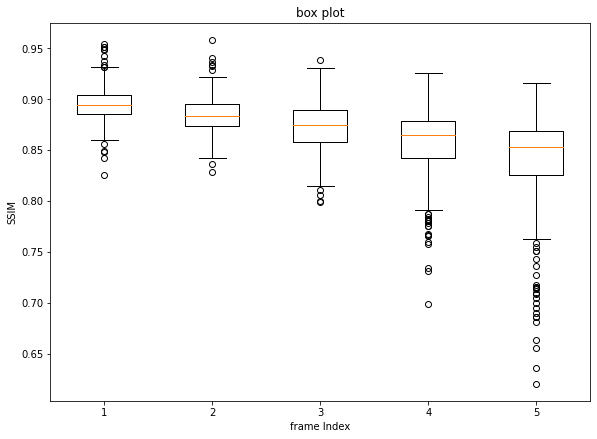

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline
  
  
# Creating dataset 
np.random.seed(10) 
  
# data_1 = ssimMatrix[:,0]
# data_2 = ssimMatrix[:,1]
# data_3 = ssimMatrix[:,2]
# data_4 = ssimMatrix[:,3]
# data_5 = ssimMatrix[:,4]
# data = [data_1, data_2, data_3, data_4, data_5] 
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
  
# Creating plot 
bp = ax.boxplot(ssimMatrix_flow)

ax.set_title("box plot")
ax.set_xlabel("frame Index")
ax.set_ylabel("SSIM")

plt.savefig(boxPlotName)

# show plot 
plt.show() 

# SSIM with dense

In [30]:
if transformation == "Homography":
  H_array_dense = np.zeros((len(resizedImgPaths)-1, 3,3 ))
elif transformation == "Affine":    
  H_array_dense = np.zeros((len(resizedImgPaths)-1, 2,3 ))
showImages = False

In [31]:
len(resizedImgPaths)

300

In [32]:
for i in range(len(resizedImgPaths) - 1):
  destImgPath = resizedImgPaths[i] #the previous image
  srcImgPath =  resizedImgPaths[i + 1];
  srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)

  cropped_src_img = sp.get_square_in_image(srcImg, squareLength, False)
  cropped_dest_img = sp.get_square_in_image(destImg, squareLength, False)

  H, status = sp.findDenseTransformation(cropped_src_img, cropped_dest_img)

  H_array_dense[i] = H

In [33]:
# H_array_dense = H_array[1:seq_length]
# flowPaths = config_project.get_img_paths(flowPaths, seq_name, is_exact)
H_array_dense.shape

(299, 2, 3)

In [34]:
ssimMatrix_lk = sp.getSSIMForFrameDistance(window_size, frame_distance, H_array_dense, transformation, squareLength, resizedImgPaths, showImages)

## Box plots

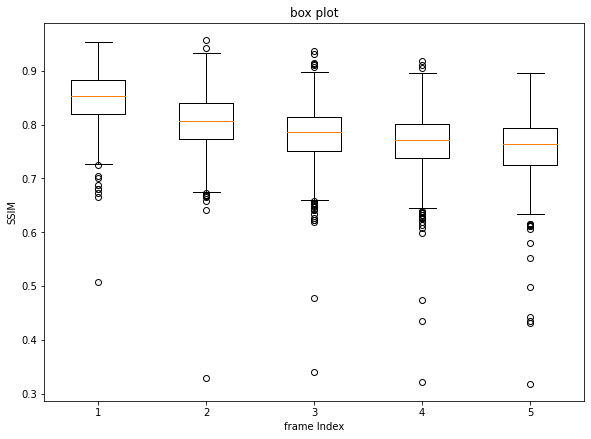

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline
  
  
# Creating dataset 
np.random.seed(10) 
  
# data_1 = ssimMatrix[:,0]
# data_2 = ssimMatrix[:,1]
# data_3 = ssimMatrix[:,2]
# data_4 = ssimMatrix[:,3]
# data_5 = ssimMatrix[:,4]
# data = [data_1, data_2, data_3, data_4, data_5] 
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
  
# Creating plot 
bp = ax.boxplot(ssimMatrix_lk)

ax.set_title("box plot")
ax.set_xlabel("frame Index")
ax.set_ylabel("SSIM")

plt.savefig(boxPlotName)

# show plot 
plt.show() 

# Using soft_l1 loss : npload numpy file

In [36]:
H_array_soft_L1 = np.load(f'new_H_array_{seq_name}.npy')

In [37]:
H_array_soft_L1.shape

(300, 2, 3)

In [38]:
ssimMatrix_soft_L1 = sp.getSSIMForFrameDistance(window_size, frame_distance, H_array_soft_L1, transformation, squareLength, resizedImgPaths, showImages)

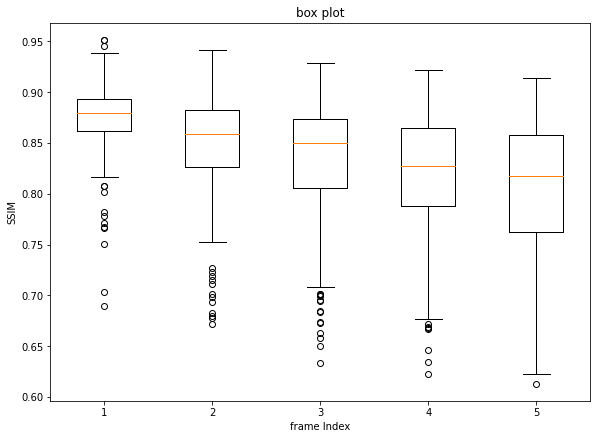

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline
  
  
# Creating dataset 
np.random.seed(10) 
  
# data_1 = ssimMatrix[:,0]
# data_2 = ssimMatrix[:,1]
# data_3 = ssimMatrix[:,2]
# data_4 = ssimMatrix[:,3]
# data_5 = ssimMatrix[:,4]
# data = [data_1, data_2, data_3, data_4, data_5] 
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
  
# Creating plot 
bp = ax.boxplot(ssimMatrix_soft_L1)

ax.set_title("box plot")
ax.set_xlabel("frame Index")
ax.set_ylabel("SSIM")

plt.savefig(boxPlotName)

# show plot 
plt.show() 

# Add MICCAI paper to SSIM

In [40]:
import scipy.io
miccai_path = '/content/' + seq_name + '_miccai/Fname_and_H.mat'
mat = scipy.io.loadmat(miccai_path)

In [41]:
imgPaths =  [ imgDirPath + '/' + f  for f  in sorted(listdir(imgDirPath))]
imgPaths = config_project.get_img_paths(imgPaths, seq_name, is_exact)

In [42]:
first_file = mat['Fname'][0]
last_file = mat['Fname'][-1]
print("first_file ",first_file )
print("last_file ", last_file)
print("first imPaths ", imgPaths[0])
print("last imPaths ", imgPaths[-1])

first_file  [(array(['anon002_01751.png'], dtype='<U17'), array(['/data2/sophiabano2/Placenta_vesselSeg/MICCAI2020longdata/anon002_1631_2630/best_unet_resnet101/predicted_mask'],
      dtype='<U109'), array(['27-Jan-2021 16:56:09'], dtype='<U20'), array([[144296]], dtype=int32), array([[0]], dtype=uint8), array([[738183.70565972]]))]
last_file  [(array(['anon002_02050.png'], dtype='<U17'), array(['/data2/sophiabano2/Placenta_vesselSeg/MICCAI2020longdata/anon002_1631_2630/best_unet_resnet101/predicted_mask'],
      dtype='<U109'), array(['27-Jan-2021 16:57:28'], dtype='<U20'), array([[184078]], dtype=int32), array([[0]], dtype=uint8), array([[738183.70657407]]))]
first imPaths  /content/anon002/anon002_01751.png
last imPaths  /content/anon002/anon002_02050.png


In [43]:
H_array_miccai = mat['H_dense']
H_array_miccai = np.squeeze(H_array_miccai)
H_array_miccai = H_array_miccai [1:seq_length]

In [44]:
H_array_miccai.shape

(299,)

In [45]:
H_affine = np.zeros( (len(H_array_miccai), 2,3))

for i in range(len(H_array_miccai)):
  H = H_array_miccai[i]
  H_affine[i] =  H[:2, :]

Testing the code, to figure out error

In [46]:
v_crop_top = seq_config[seq_name]["v_crop_top"]
v_crop_bottom = seq_config[seq_name]["v_crop_bottom"]

mask_im = fp.get_mask_im(imgPaths, mask_path, v_crop_top, v_crop_bottom)

In [47]:
ssimMatrix_miccai = sp.getSSIMForFrameDistance(window_size, frame_distance, H_affine, transformation, squareLength, imgPaths, showImages)

In [48]:
ssimMatrix_miccai

array([[0.8309225 , 0.808574  , 0.80627214, 0.77397819, 0.73383466],
       [0.83331735, 0.82920422, 0.81117279, 0.77766145, 0.76347708],
       [0.84036958, 0.81805134, 0.78862297, 0.76807001, 0.75909762],
       ...,
       [0.85305955, 0.85588305, 0.85073714, 0.81239777, 0.82792322],
       [0.83945192, 0.82944971, 0.79378704, 0.80992508, 0.81484825],
       [0.86260963, 0.82411644, 0.84114592, 0.83936633, 0.82914674]])

## Box plots

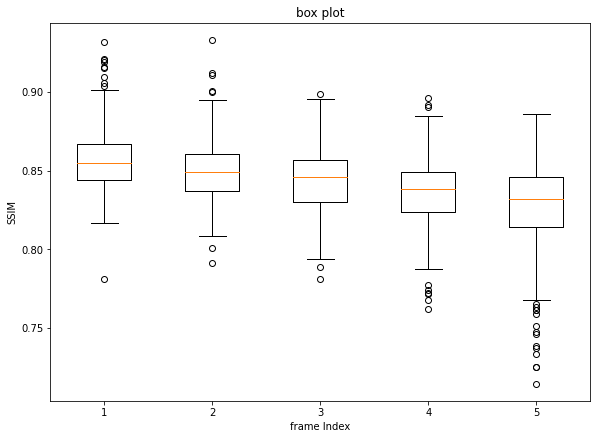

In [49]:
import matplotlib.pyplot as plt 
%matplotlib inline
  
  
# Creating dataset 
np.random.seed(10) 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
  
# Creating plot 
bp = ax.boxplot(ssimMatrix_miccai)

ax.set_title("box plot")
ax.set_xlabel("frame Index")
ax.set_ylabel("SSIM")

plt.savefig(boxPlotName)

# show plot 
plt.show() 

# add RAFT

In [50]:
imgPaths =  [ imgDirPath + '/' + f  for f  in sorted(listdir(imgDirPath))]
raftFlowPaths =  [ raftFlowFileDirPath + '/' + f  for f  in sorted(listdir(raftFlowFileDirPath))]
mask_path = '/content/masks/' + seq_name +  '_mask.png'

In [51]:
print(len(raftFlowPaths))
print(len(imgPaths))

999
1000


In [52]:
# imgPaths = config_project.get_img_paths(resizedImgPaths, seq_name, is_exact)
imgPaths = config_project.get_img_paths(imgPaths, seq_name, is_exact)
raftFlowPaths = config_project.get_img_paths(raftFlowPaths, seq_name, is_exact)

In [53]:
imgPaths[0]

'/content/anon002/anon002_01751.png'

In [54]:
raftFlowPaths[0]

'/content/flow_files_raft_anon002/anon002_01751.flo'

In [55]:
len(raftFlowPaths)

300

In [56]:
v_crop_top = seq_config[seq_name]["v_crop_top"]
v_crop_bottom = seq_config[seq_name]["v_crop_bottom"]

mask_im = fp.get_mask_im(imgPaths, mask_path, v_crop_top, v_crop_bottom)

In [57]:
len(imgPaths)

300

In [58]:
if transformation == "Homography":
  H_array_raft = np.zeros((len(imgPaths)-1, 3,3 ))
elif transformation == "Affine":    
  H_array_raft = np.zeros((len(imgPaths)-1, 2,3 ))
  
showImages = False

In [59]:
for i in range(len(imgPaths) - 1): #
  print(i)
  destImgPath = imgPaths[i] #the previous image
  srcImgPath =  imgPaths[i + 1];
  raftFlowPath = raftFlowPaths[i]

  srcImg, destImg = fp.inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
  flow = fp.inputAndFormatFlowfile(raftFlowPath)
  I, J = fp.getCameraPixels(destImg, mask_im)
  ptsA, ptsB = fp.pointCorrespondenceFromOpticalFlow(flow, 0 ,I, J)
  H, status = fp.findTransformation(ptsA, ptsB,transformation, threshold)
  
  H_array_raft[i] = H

0
tag 202021.25 width 544 height 544
(544, 544, 2)
1
tag 202021.25 width 544 height 544
(544, 544, 2)
2
tag 202021.25 width 544 height 544
(544, 544, 2)
3
tag 202021.25 width 544 height 544
(544, 544, 2)
4
tag 202021.25 width 544 height 544
(544, 544, 2)
5
tag 202021.25 width 544 height 544
(544, 544, 2)
6
tag 202021.25 width 544 height 544
(544, 544, 2)
7
tag 202021.25 width 544 height 544
(544, 544, 2)
8
tag 202021.25 width 544 height 544
(544, 544, 2)
9
tag 202021.25 width 544 height 544
(544, 544, 2)
10
tag 202021.25 width 544 height 544
(544, 544, 2)
11
tag 202021.25 width 544 height 544
(544, 544, 2)
12
tag 202021.25 width 544 height 544
(544, 544, 2)
13
tag 202021.25 width 544 height 544
(544, 544, 2)
14
tag 202021.25 width 544 height 544
(544, 544, 2)
15
tag 202021.25 width 544 height 544
(544, 544, 2)
16
tag 202021.25 width 544 height 544
(544, 544, 2)
17
tag 202021.25 width 544 height 544
(544, 544, 2)
18
tag 202021.25 width 544 height 544
(544, 544, 2)
19
tag 202021.25 width

In [60]:
# H_array.shape

In [61]:
seq_length = seq_config[seq_name]["file_length"] 

In [62]:
seq_length

300

In [63]:
ssimMatrix_raft_flow = sp.getSSIMForFrameDistance(window_size, frame_distance, H_array_raft, transformation, squareLength, imgPaths, showImages)

In [64]:
ssimMatrix_raft_flow

array([[0.83527592, 0.81299417, 0.81185108, 0.80436062, 0.7753745 ],
       [0.83139351, 0.82852389, 0.81881126, 0.77899225, 0.77826041],
       [0.83739096, 0.82024805, 0.77803451, 0.76585553, 0.753794  ],
       ...,
       [0.83719387, 0.79930037, 0.7737075 , 0.73117622, 0.7459554 ],
       [0.81604114, 0.78170826, 0.72064645, 0.72954795, 0.74250729],
       [0.84254165, 0.77847768, 0.76937678, 0.78057553, 0.77845997]])

In [65]:
np.min(ssimMatrix_raft_flow)

0.6888403527203237

## Box plots

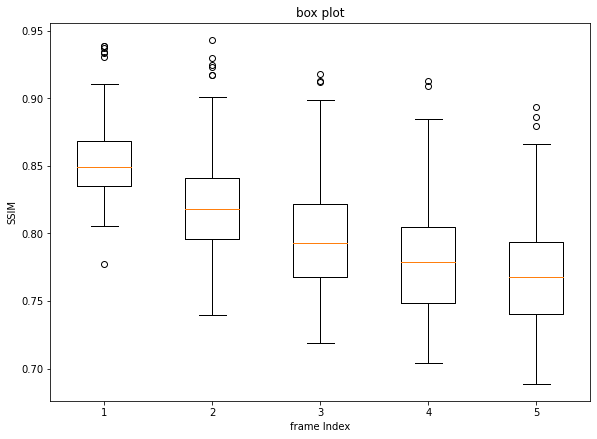

In [66]:
import matplotlib.pyplot as plt 
%matplotlib inline
  
  
# Creating dataset 
np.random.seed(10) 
  
# data_1 = ssimMatrix[:,0]
# data_2 = ssimMatrix[:,1]
# data_3 = ssimMatrix[:,2]
# data_4 = ssimMatrix[:,3]
# data_5 = ssimMatrix[:,4]
# data = [data_1, data_2, data_3, data_4, data_5] 
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
  
# Creating plot 
bp = ax.boxplot(ssimMatrix_raft_flow)

ax.set_title("box plot")
ax.set_xlabel("frame Index")
ax.set_ylabel("SSIM")


# show plot 
plt.show() 

## Final Plot

In [67]:
# _, class_size = ssimMatrix_miccai.shape

In [68]:
# font = {'weight' : 'bold',
#         'size'   : 22}

# plt.rc('font', **font)

# plt.rcParams['figure.figsize'] = 5, 7
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [69]:
# ticks = ['1', '2', '3', '4', '5']
# yticks = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# def set_box_color(bp, color):
#     plt.setp(bp['boxes'], color=color, linewidth=2.0)
#     plt.setp(bp['whiskers'], color=color, linewidth=2.0, linestyle='--' )
#     plt.setp(bp['caps'], color=color, linewidth=2.0)
#     plt.setp(bp['medians'], color=color, linewidth=2.0,)

# plt.figure()

# bpl = plt.boxplot(ssimMatrix_miccai, positions=np.array(range(class_size))*0.8-0.15, sym='', widths=0.07)
# bpm = plt.boxplot(ssimMatrix_flow, positions=np.array(range(class_size))*0.8, sym='', widths=0.07)
# # bpr = plt.boxplot(ssimMatrix_lk, positions=np.array(range(class_size))*0.8+0.15, sym='', widths=0.07)

# set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bpm, '#43A2CA')
# set_box_color(bpr, '#AC7BB6')

# plt.grid(True, linestyle='-', which='major', color='lightgrey',
#                alpha=0.5) 


# plt.xlabel("Frame Distance", fontsize=27)
# # plt.ylabel("SSIM", fontsize=27)
# plt.title(boxPlotTitle)
# plt.xticks(np.arange(0, 4, step=0.8), ticks)
# plt.yticks(yticks, yticks)
# plt.tight_layout()
# plt.savefig(boxPlotName)

In [70]:
# import shutil
# shutil.rmtree('/content/resized_image')

In [71]:
# os.remove("/content/" + boxPlotName)

In [72]:
boxPlotName

'boxplot_anon002_extra_affine.png'

In [73]:
font = {'weight' : 'bold',
        'size'   : 13}

plt.rc('font', **font)

plt.rcParams['figure.figsize'] = 5, 7
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [74]:
ssimMatrix_flow_3 = ssimMatrix_flow[:, :3]
ssimMatrix_raft_flow_3 = ssimMatrix_raft_flow[:, :3]
ssimMatrix_miccai_3 = ssimMatrix_miccai[:, :3]
ssimMatrix_lk_3 = ssimMatrix_lk[:, :3]
ssimMatrix_soft_L1_3 = ssimMatrix_soft_L1[:, :3]

In [75]:
# class_size = 5
class_size = 3

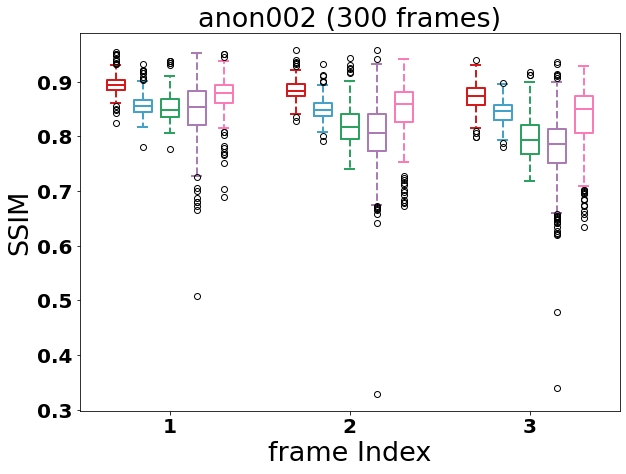

In [76]:
import matplotlib.pyplot as plt 
%matplotlib inline

ticks = ['1', '2', '3']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color, linewidth=2.0)
    plt.setp(bp['whiskers'], color=color, linewidth=2.0, linestyle='--' )
    plt.setp(bp['caps'], color=color, linewidth=2.0)
    plt.setp(bp['medians'], color=color, linewidth=2.0,)
  
  
# Creating dataset 
np.random.seed(10) 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
ax.set_xlim(-0.5, 2.5)
  
# Creating plot 
bp_mine = plt.boxplot(ssimMatrix_flow_3, positions=np.array(range(class_size))*1-0.3, widths=0.1, showfliers=True, sym="o")
bp_miccai = plt.boxplot(ssimMatrix_miccai_3, positions=np.array(range(class_size))*1-0.15, widths=0.1, showfliers=True, sym="o")
bp_raft = plt.boxplot(ssimMatrix_raft_flow_3, positions=np.array(range(class_size))*1, widths=0.1, showfliers=True, sym="o")
bp_lk = plt.boxplot(ssimMatrix_lk_3, positions=np.array(range(class_size))*1+0.15, widths=0.1, showfliers=True, sym="o")
bp_softl1 = plt.boxplot(ssimMatrix_soft_L1_3, positions=np.array(range(class_size))*1+0.3, widths=0.1, showfliers=True, sym="o")


set_box_color(bp_mine, '#D7191C') 
set_box_color(bp_miccai, '#43A2CA')
set_box_color(bp_raft, '#2CA25f')
set_box_color(bp_lk, '#AC7BB6')
set_box_color(bp_softl1, '#FC7BB6')

ax.set_xlabel("frame Index", fontsize=27)
ax.set_ylabel("SSIM", fontsize=27)

plt.xticks(np.arange(0, 3, step=1), ticks)
plt.savefig(boxPlotName)

plt.title(boxPlotTitle, fontsize=27)

plt.savefig(boxPlotName)

# show plot 
plt.show()